Based on Jake VanderPlas Python Data Science Handbook

In [1]:
import numpy as np
import pandas as pd

# Feature Engineering

The previous lecture covered the ideas of cross-validation which is very important to finding the right model fit without traditional statistics tools like the p-value.

Fitting models in sklearn require the predictor variables (features) to be in a nicely formed matrix where each row represents an observation and each column is a variable.

Feature engineering is the idea of taking your data and turning them into numbers for a matrix.

## Categorical Features

If you have a categorical variable, sklearn is not able to directly use that categorical information. We have to make them numeric.

We might be tempted to make an R-style factor out of the variable, and assign each category an integer value.

For example:

- Red becomes 1
- Blue becomes 2
- Yellow becomes 3
- etc.

This however will not work well because when sklearn sees the values 1, 2, 3 it will think they represent quantities. That 'yellow' has three times as much of some quantity than 'red' does.

Instead, we take these categories and do *one-hot* encoding. We'll have a column for each of the possible categories, and the variable will be turned into a 1 or 0.

One-hot encoding:

- A column for Red with 1 if it is red, and 0 for everything else.
- A column for blue with 1 if it is blue, and 0 for everything else.
- A column for yellow with 1 if it is yellow, and 0 for everything else.


In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
titanic = pd.read_csv('titanic_train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Using OneHotEncoder for one variable:

In [11]:
enc = OneHotEncoder(sparse = False)
enc

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [12]:
enc.fit( titanic[['Sex']] )

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [13]:
enc.transform(titanic[['Sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [14]:
enc.fit_transform( titanic[['Sex']] )[0:5,:]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [15]:
enc.categories_

[array(['female', 'male'], dtype=object)]

In [16]:
# fit all into a DataFrame
pd.DataFrame( enc.fit_transform(titanic[['Sex']]), columns = enc.categories_).head()

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [17]:
enc = OneHotEncoder(sparse = False, categories = 'auto')
enc.fit_transform(titanic[['Pclass']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [18]:
enc.categories_

[array([1, 2, 3], dtype=int64)]

One Hot encoding for multiple columns at the same time

In [19]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
titanic_subset = titanic[['Pclass', 'Sex']].dropna()

In [21]:
titanic_subset.head()

,Pclass,Sex
0,3,male
1,1,female
2,3,female
3,1,female
4,3,male


In [22]:
titanic_subset.shape

(891, 2)

In [23]:
enc = OneHotEncoder(sparse = False, categories = 'auto')
results = enc.fit_transform(titanic_subset)

In [24]:
results.shape

(891, 5)

In [26]:
results[0:5, :]

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.]])

In [25]:
enc.categories_

[array([1, 2, 3], dtype=object), array(['female', 'male'], dtype=object)]

In [28]:
[value   for array in enc.categories_   for value in array]

[1, 2, 3, 'female', 'male']

In [29]:
pd.DataFrame(results, columns = [y   for x in enc.categories_   for y in x]).head()

,1,2,3,female,male
0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0


# Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values. For example, most automatic mining of social media data relies on some form of encoding the text as numbers. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

In [30]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html


In [32]:
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [33]:
X.toarray()

array([[1, 0, 1, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0]], dtype=int64)

In [34]:
vec.get_feature_names()

['evil', 'horizon', 'of', 'problem', 'queen']

In [35]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

<https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html>

<https://en.wikipedia.org/wiki/Tf%E2%80%93idf>

In [40]:
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
# values are weighted according to how many times the word appears
# and how many words are in the document

# the word 'of' only appears in the first document
# but the first document has three words, so its weight is 0.68

# the word 'horizon' appears only in the third document
# the thrid documnet only has two words, so each word is weighted more
# horizon is weighted 0.796

# 'evil' is in first and second document
# each appearance is weighted a bit less
# worth more in the second document which only has two words
# worth less in the first document which has three words

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


# Imputation of Missing Data

In [42]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [44]:
# warning, filling in the mean is not always the best strategy
# perhaps you need to use the EM algorithm

# but the simple imputer is great for filling in with simple rules like the mean
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [46]:
imp = SimpleImputer(strategy='constant', fill_value = -99)
X3 = imp.fit_transform(X)
X3

array([[-99.,   0.,   3.],
       [  3.,   7.,   9.],
       [  3.,   5.,   2.],
       [  4., -99.,   6.],
       [  8.,   8.,   1.]])

In [47]:
# you can then use the imputed values for a linear regression model:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

# Polynomial Features

In [48]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [51]:
X = x.reshape(5,1)
poly = PolynomialFeatures(degree=3, include_bias=True) 
# include bias will include a 0 power column
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


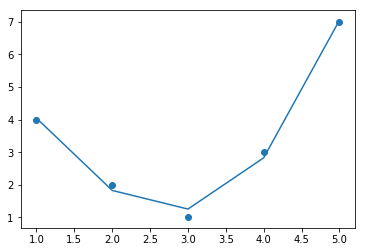

In [52]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

# Feature Pipelines

With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps. For example, we might want a processing pipeline that looks something like this:

1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

In [53]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [54]:
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [55]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


In [69]:
x = np.array([1, 2, nan, 4, 5])  # where the missing value is matters
y = np.array([4, 2, 1, 3, 7])
X = x.reshape(5, 1)

In [67]:
model.fit(X,y)
model.predict(X)

array([4.14285714, 1.62857143, 1.25714286, 3.02857143, 6.94285714])